In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Data loading and indentifying of input and output variables
### After studying of dataset description it was clear that input variables are demographics feature and optionally G1 and G2 score - score for first and second study period. Output variable are G3 score and additional grades such as pass/fail or A,B,C,D,F grades. 

In [8]:
data_mat = pd.read_csv('student-mat.csv', header = 0, sep=';')
data_por = pd.read_csv('student-por.csv', header = 0, sep=';')
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# 2. Dataset preprocessing
### Firstly, I've dropped rows which has NaN values. I didn't find such rows, but I did it to avoid mistakes in the future:) Secondly, I've splitted both datasets into inputs and outputs variables.

In [10]:
data_mat = data_mat.dropna();
data_por = data_por.dropna();

In [11]:
y_mat = data_mat['G3']
y_por = data_por['G3']
X_mat = data_mat.drop(['G3'], axis = 1)
X_por = data_por.drop(['G3'], axis = 1)

### Thirdly I've transformed binary attributes to 0 and 1, because we have to deal with only numbers.

In [12]:
X_mat['sex'] = X_mat.sex.map({"F":0, "M":1})
X_por['sex'] = X_por.sex.map({"F":0, "M":1})
X_mat['address'] = X_mat.address.map({"R":0, "U":1})
X_por['address'] = X_por.address.map({"R":0, "U":1})
X_mat['famsize'] = X_mat.famsize.map({"LE3":0, "GT3":1})
X_por['famsize'] = X_por.famsize.map({"LE3":0, "GT3":1})
X_mat['Pstatus'] = X_mat.Pstatus.map({"A":0, "T":1})
X_por['Pstatus'] = X_por.Pstatus.map({"A":0, "T":1})
X_mat['schoolsup'] = X_mat.schoolsup.map({"no":0, "yes":1})
X_por['schoolsup'] = X_por.schoolsup.map({"no":0, "yes":1})
X_mat['famsup'] = X_mat.famsup.map({"no":0, "yes":1})
X_por['famsup'] = X_por.famsup.map({"no":0, "yes":1})
X_mat['paid'] = X_mat.paid.map({"no":0, "yes":1})
X_por['paid'] = X_por.paid.map({"no":0, "yes":1})
X_mat['activities'] = X_mat.activities.map({"no":0, "yes":1})
X_por['activities'] = X_por.activities.map({"no":0, "yes":1})
X_mat['nursery'] = X_mat.nursery.map({"no":0, "yes":1})
X_por['nursery'] = X_por.nursery.map({"no":0, "yes":1})
X_mat['higher'] = X_mat.higher.map({"no":0, "yes":1})
X_por['higher'] = X_por.higher.map({"no":0, "yes":1})
X_mat['internet'] = X_mat.internet.map({"no":0, "yes":1})
X_por['internet'] = X_por.internet.map({"no":0, "yes":1})
X_mat['romantic'] = X_mat.romantic.map({"no":0, "yes":1})
X_por['romantic'] = X_por.romantic.map({"no":0, "yes":1})
X_mat['school'] = X_mat.school.map({"GP":0, "MS":1})
X_por['school'] = X_por.school.map({"GP":0, "MS":1})
binary = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school']

### Attribute reason I've decided to code as 1, if student has written as a main reason, and 0 in another case, because there is no order in reason choice

In [13]:
X_mat = pd.get_dummies(X_mat, dummy_na=True, columns=['reason',])
X_por = pd.get_dummies(X_por, dummy_na=True, columns=['reason',])

### And nominals attribute I've coded from 0 to 4 or 2. In my opinion, there is an order. If one or both your parents are teachers you study more hardly than they are managers.

In [15]:
X_mat['Mjob'] = X_mat.Mjob.map({"teacher":0, "health":1, "services":2, "at_home":3, "other":4})
X_por['Mjob'] = X_por.Mjob.map({"teacher":0, "health":1, "services":2, "at_home":3, "other":4})
X_mat['Fjob'] = X_mat.Fjob.map({"teacher":0, "health":1, "services":2, "at_home":3, "other":4})
X_por['Fjob'] = X_por.Fjob.map({"teacher":0, "health":1, "services":2, "at_home":3, "other":4})
X_mat['guardian'] = X_mat.guardian.map({"mother":0, "father":1, "other":2})
X_por['guardian'] = X_por.guardian.map({"mother":0, "father":1, "other":2})
nominals = [['Mjob', 5], ['Fjob', 5], ['guardian', 3]]

Text(0.5,1,'Portugal G3 score ditribution')

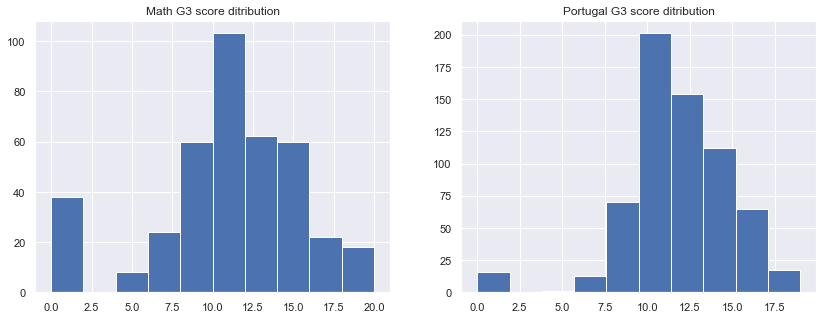

In [39]:
y_mat = np.array(y_mat)
y_por = np.array(y_por)
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.hist(y_mat)
plt.title('Math G3 score ditribution');
plt.subplot(1,2,2)
plt.hist(y_por)
plt.title('Portugal G3 score ditribution');

# 3. Data visualization and analisys
### Graphs of binary attributes show that distributions of many catigories are high correlated. However, less correlation is provided by scolarsup (those who don't have scloarsup have higher grades in both disciplines), higher education (if students have higher education they have higher grades in both discilines) and school (in Gabriel Pereira school students know Portugal better than in Mousinho da Silveira school).

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


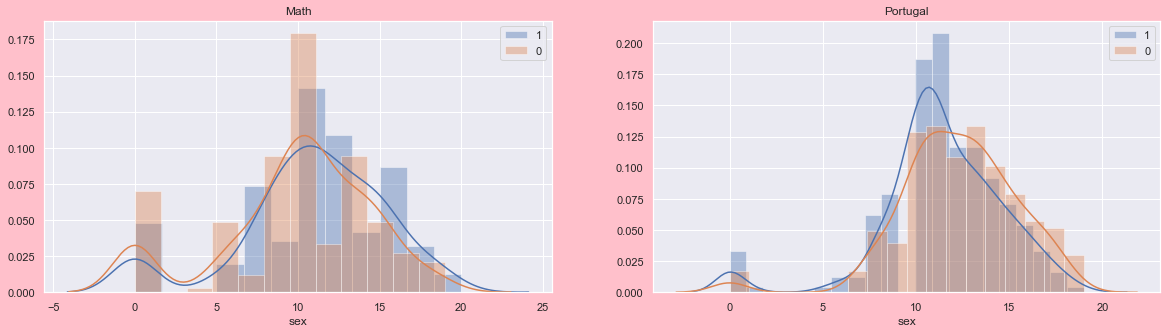

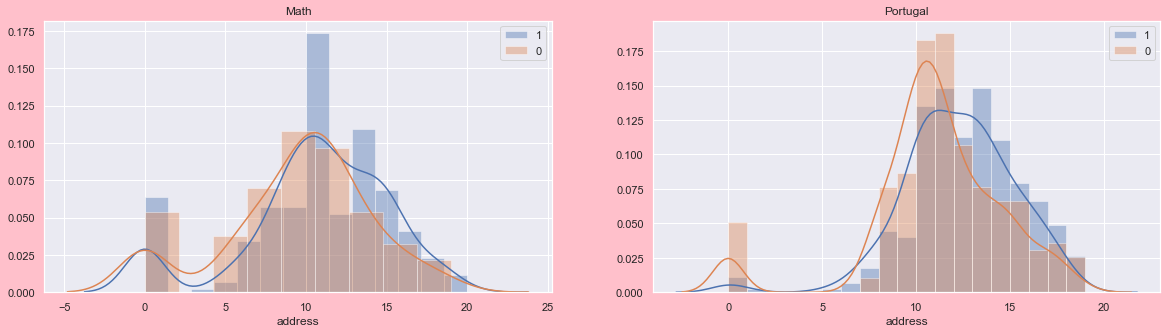

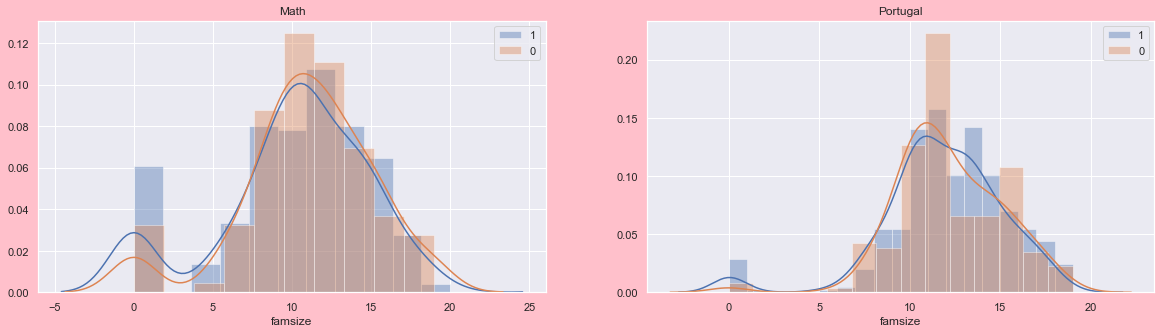

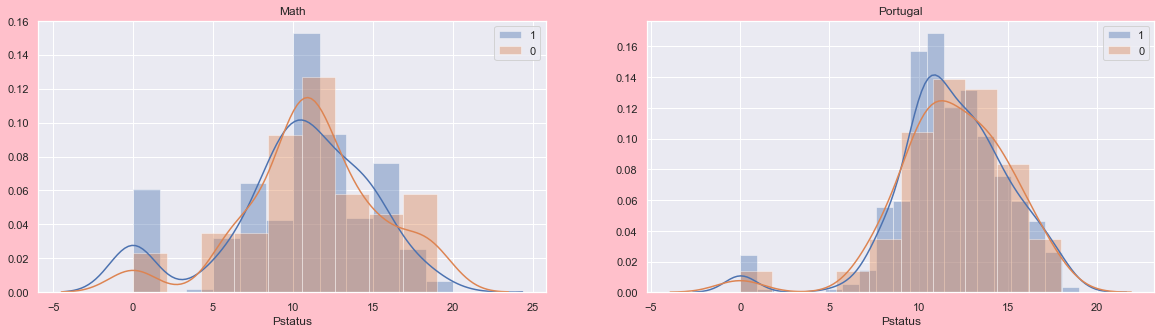

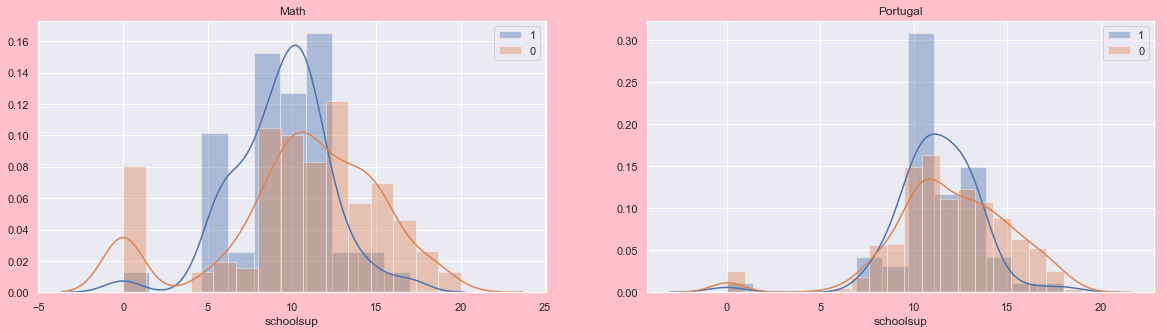

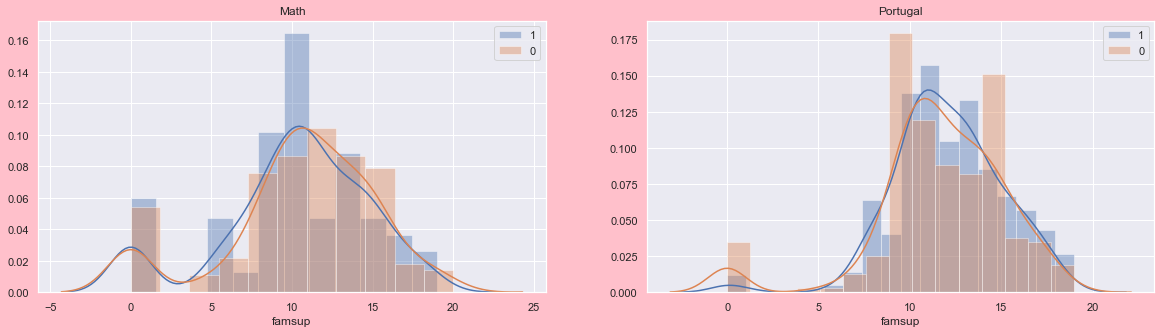

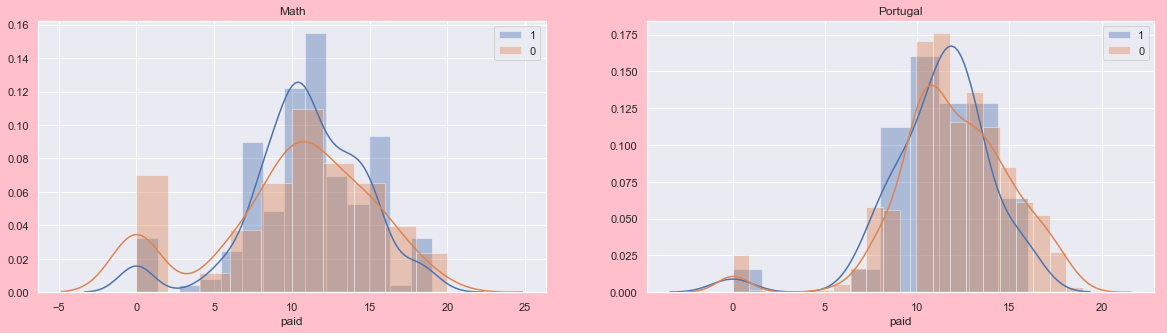

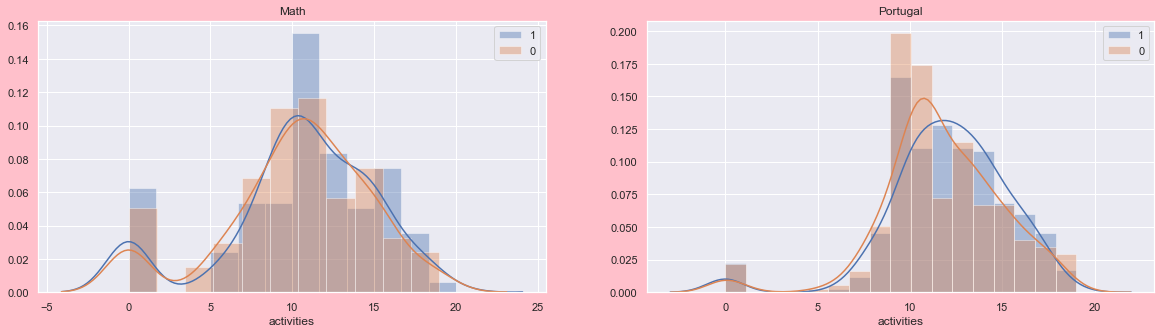

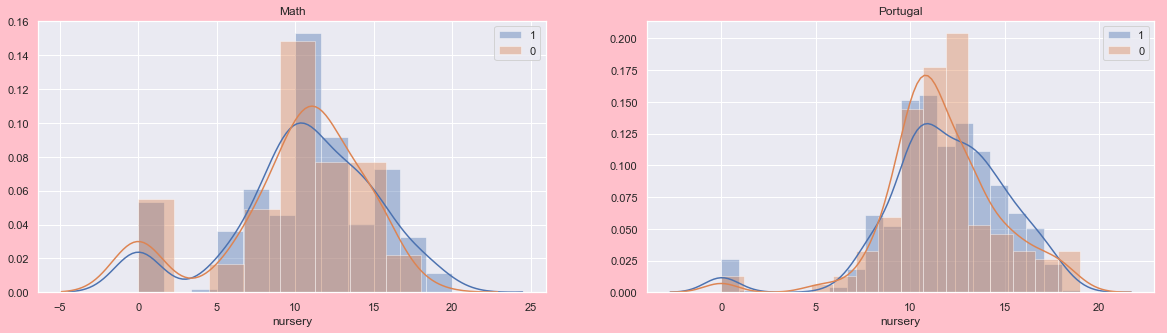

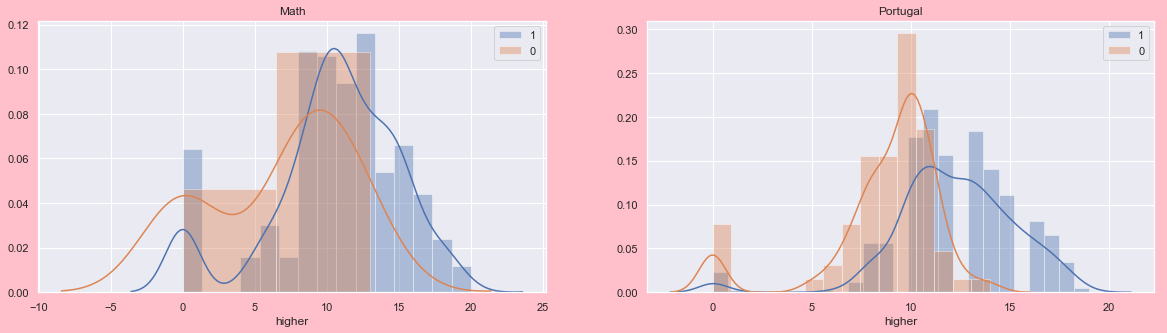

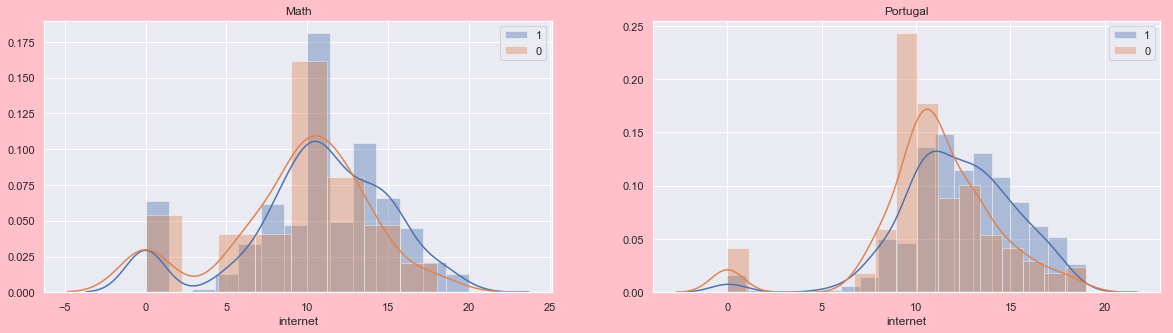

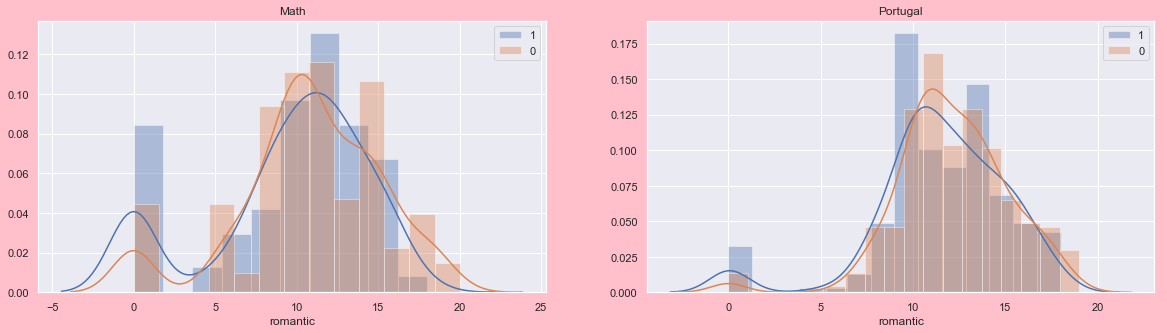

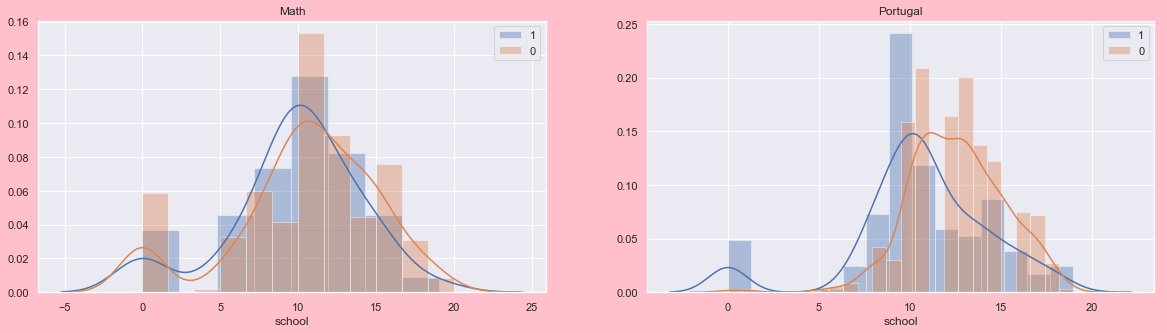

In [17]:
for proper in binary:
    plt.figure(figsize = (20, 5), facecolor='pink', frameon=True);
    one_mat = X_mat[proper] == 1
    zero_mat = X_mat[proper] == 0
    one_por = X_por[proper] == 1
    zero_por = X_por[proper] == 0
    plt.subplot(1, 2, 1);
    sns.distplot(y_mat[one_mat])#, hist = False);
    sns.distplot(y_mat[zero_mat])#, hist = False);
    plt.legend(('1', '0'));
    plt.xlabel(proper);
    plt.title('Math');
    plt.subplot(1, 2, 2);
    sns.distplot(y_por[one_por])#, hist = False);
    sns.distplot(y_por[zero_por])#, hist = False);
    plt.legend(('1', '0'));
    plt.xlabel(proper);
    plt.title('Portugal');

### Using most of numerical attributes it is difficult to predict some pattern, but G1 and G2 score are high correlated with G3. Another meaningful feature are failures, absences, workday alcohol consumption and traveltime. If value of these features are low, better score students ar able to obltain, as it is in real life. 

In [18]:
numerics = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

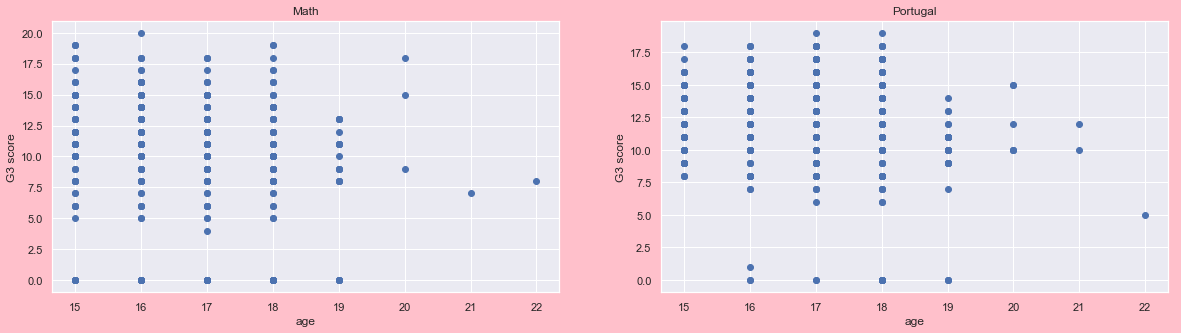

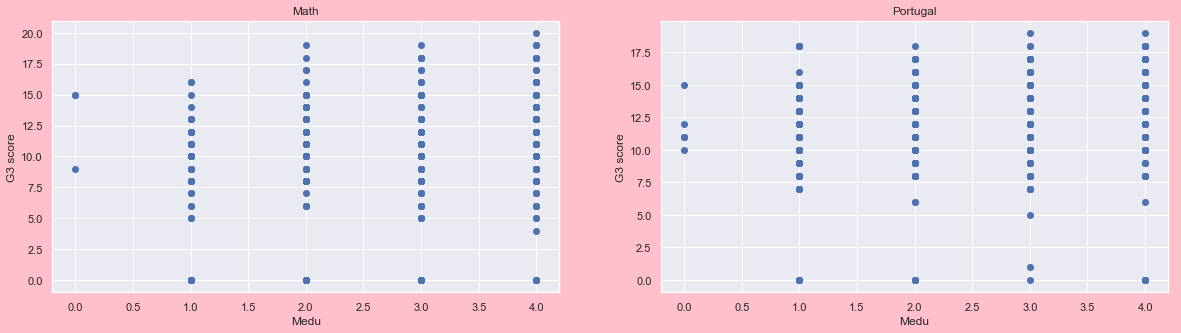

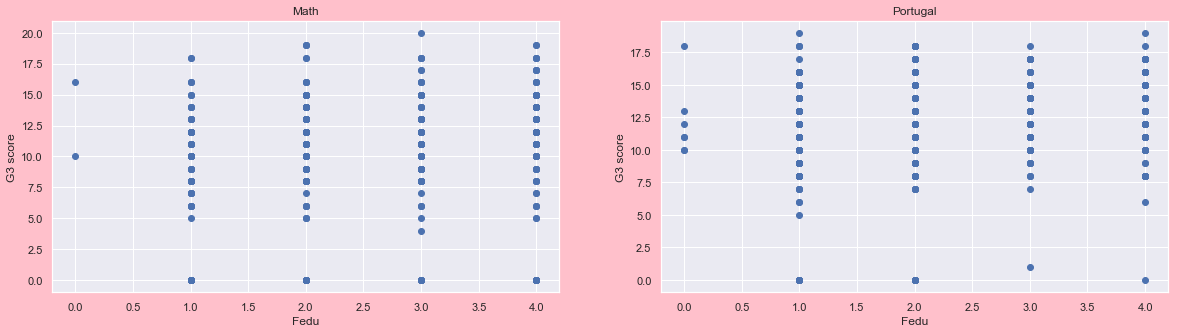

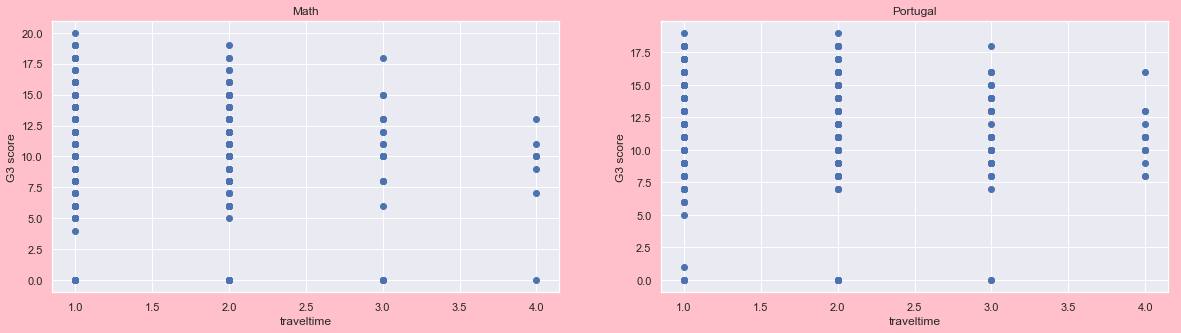

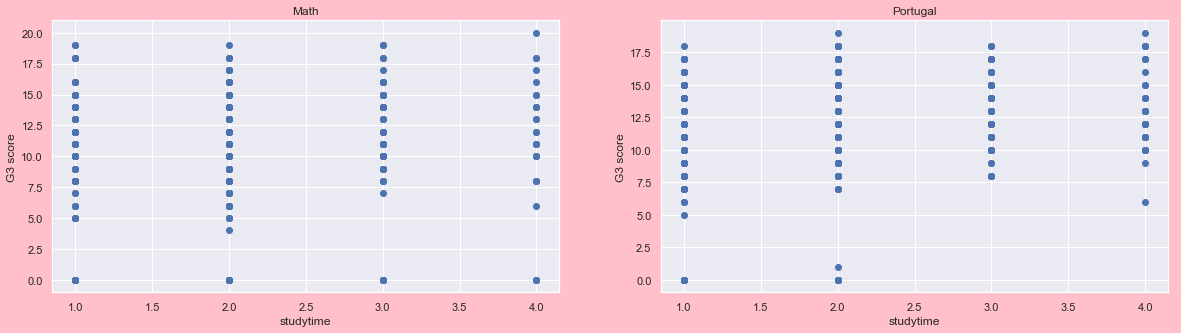

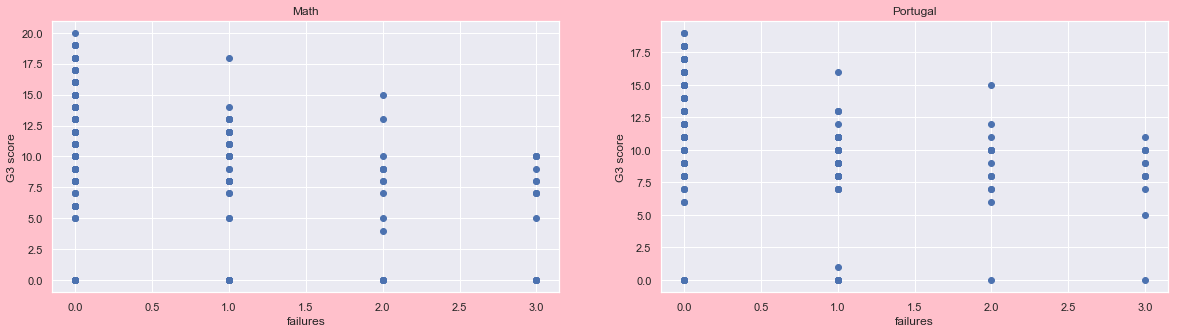

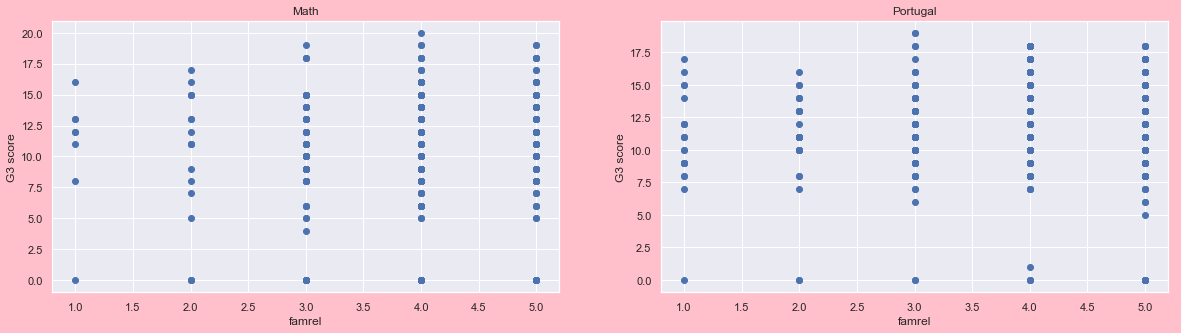

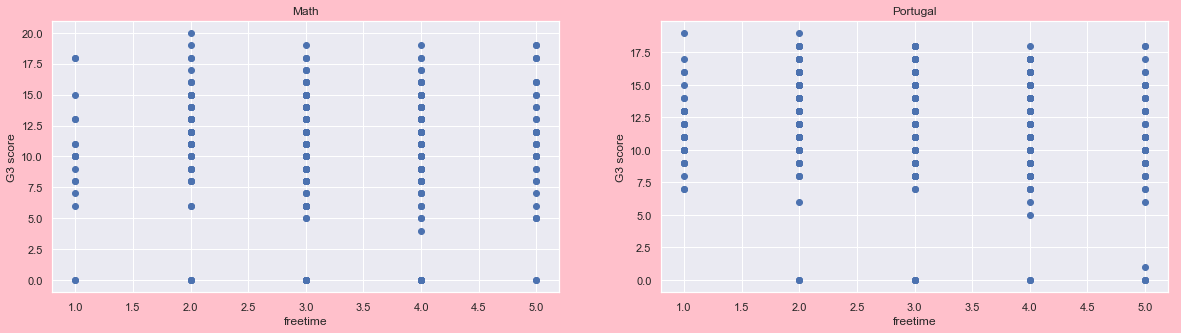

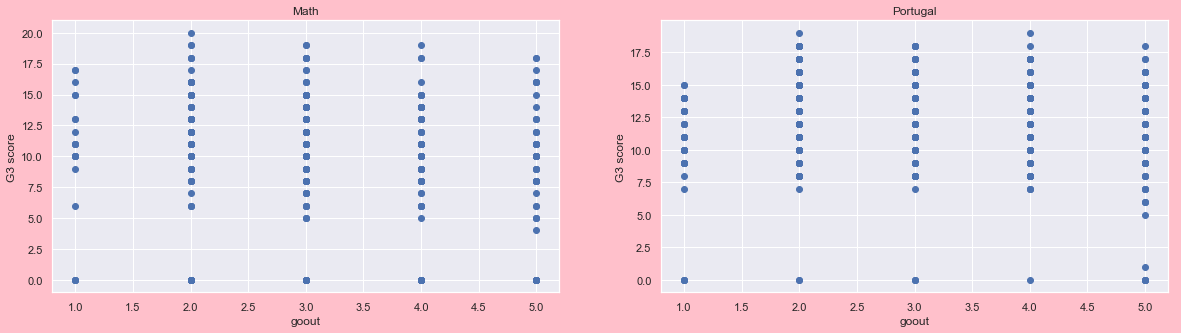

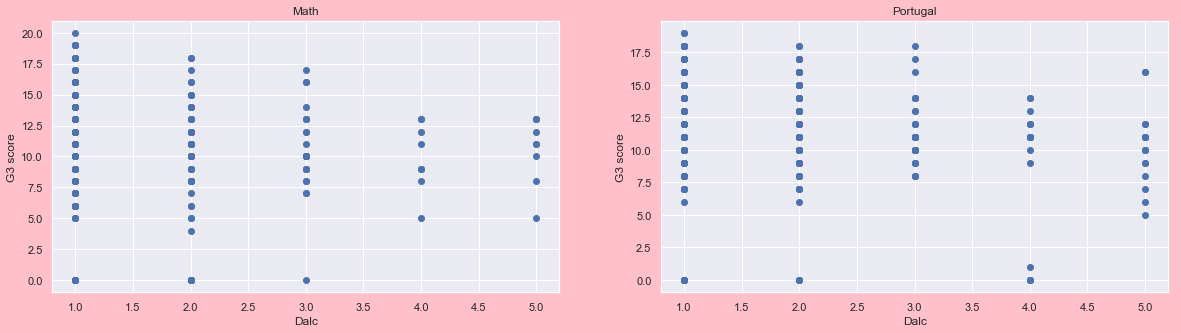

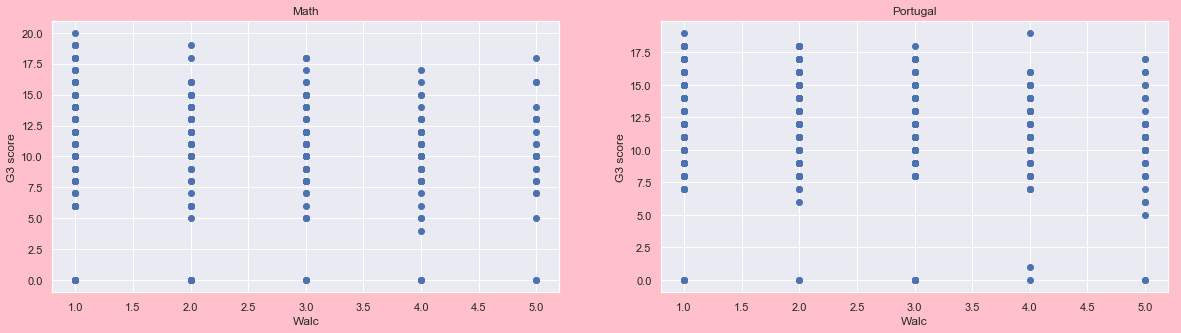

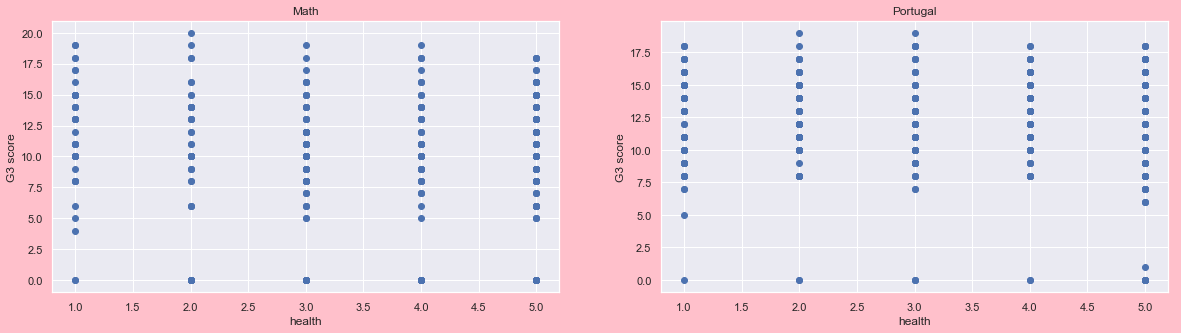

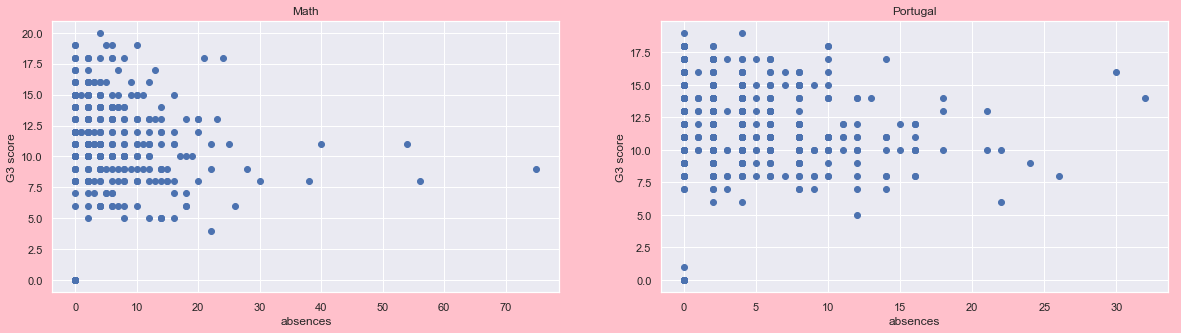

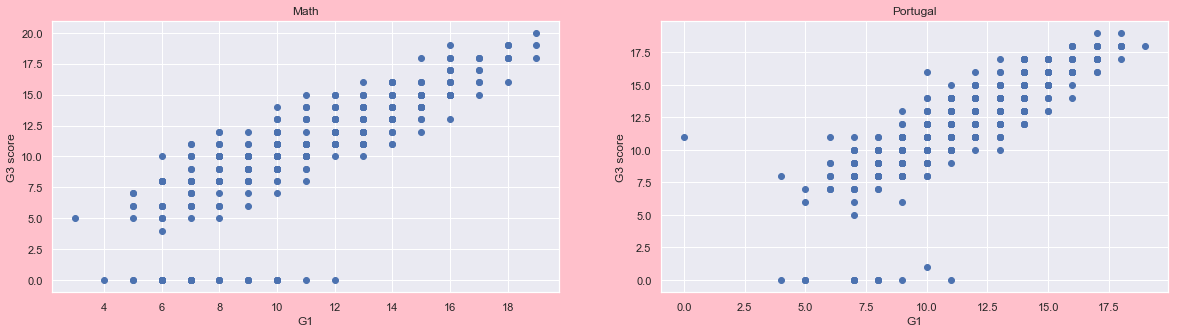

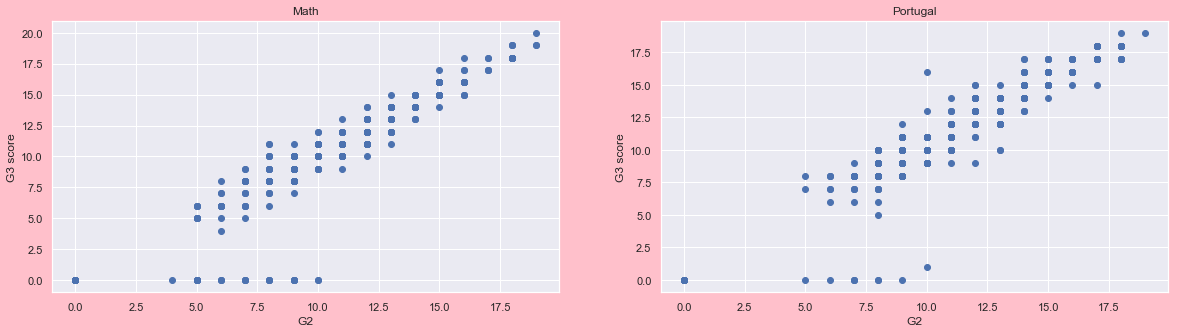

In [19]:
for numeric in numerics:
    plt.figure(figsize = (20, 5), facecolor='pink', frameon=True);
    plt.subplot(1, 2, 1);
    plt.plot(X_mat[numeric], y_mat, 'o')#, hist = False);
    plt.ylabel('G3 score');
    plt.xlabel(numeric);
    plt.title('Math');
    plt.subplot(1, 2, 2);
    plt.plot(X_por[numeric], y_por, 'o')#, hist = False);
    plt.ylabel('G3 score');
    plt.xlabel(numeric);
    plt.title('Portugal');

### According to nominals categories it is still difficult to forecast G3 score.

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


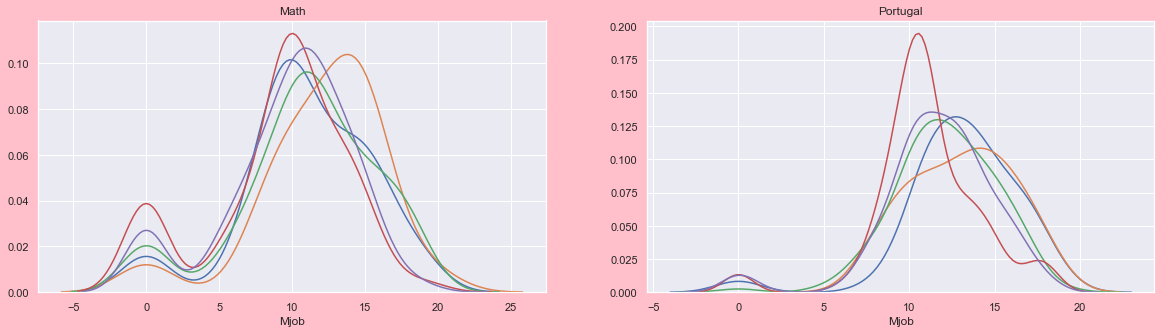

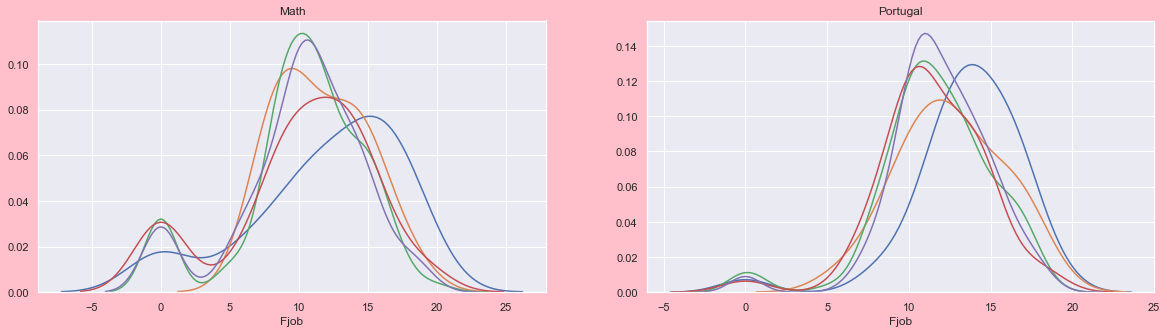

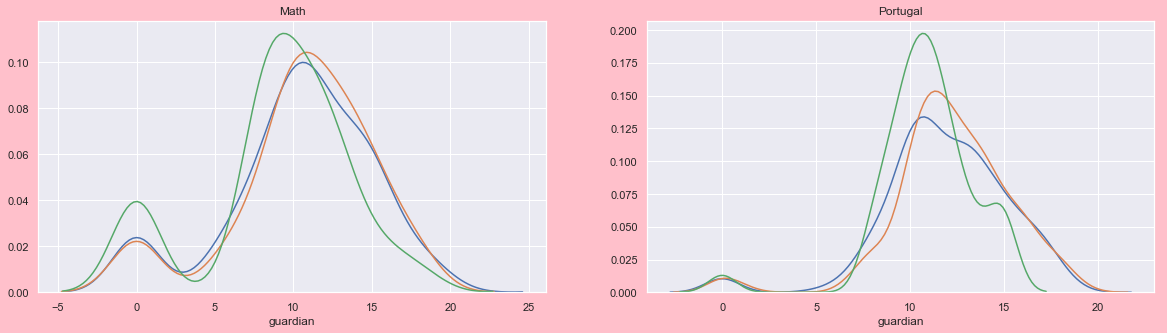

In [21]:
for nominal in nominals:
    plt.figure(figsize = (20, 5), facecolor='pink', frameon=True);
    plt.subplot(1, 2, 1);
    for i in range(nominal[1]):
        one_mat = X_mat[nominal[0]] == i
        one_por = X_por[nominal[0]] == i
        sns.distplot(y_mat[one_mat], hist = False);
    plt.xlabel(nominal[0]);
    plt.title('Math');
    
    plt.subplot(1, 2, 2);
    for i in range(nominal[1]):
        one_por = X_por[nominal[0]] == i
        sns.distplot(y_por[one_por], hist = False);
    plt.xlabel(nominal[0]);
    plt.title('Portugal');

### Distribution graphs of reason don't also provide a possibility to predict G3 score with high precision. 

In [27]:
reasons = ['reason_course', 'reason_home', 'reason_other','reason_reputation']
#X_mat = X_mat.drop(['reason_nan'], axis = 1)
#X_por = X_por.drop(['reason_nan'], axis = 1)

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


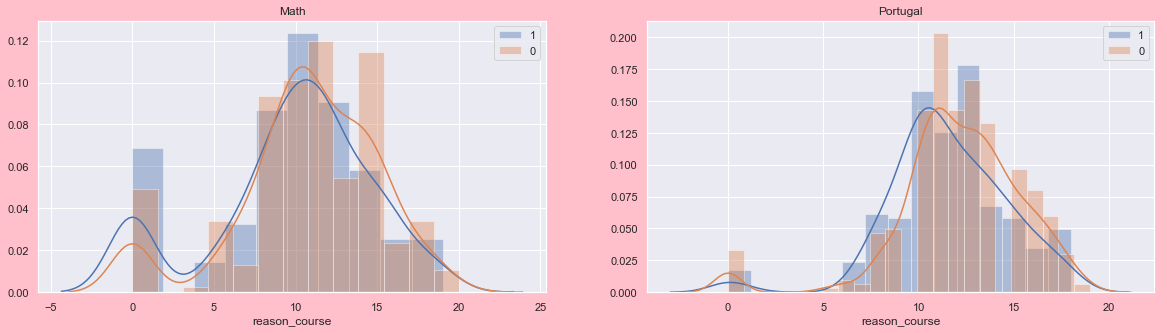

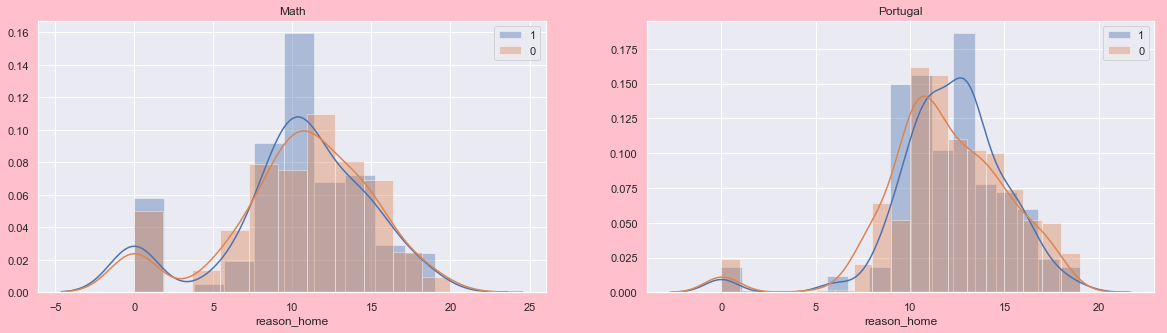

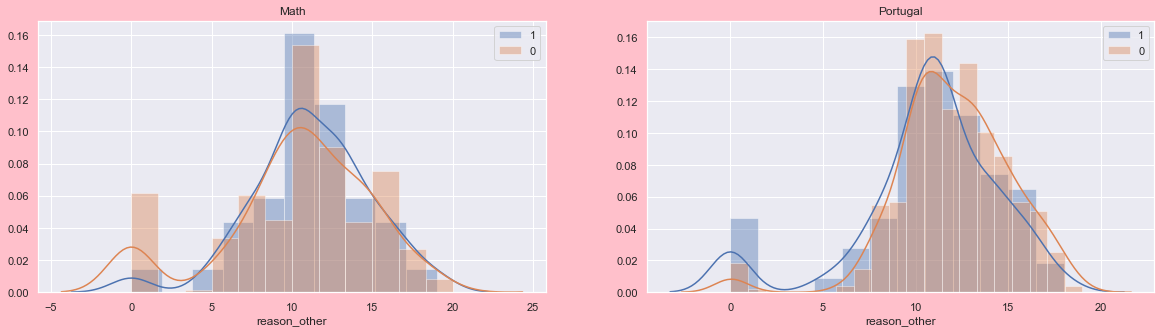

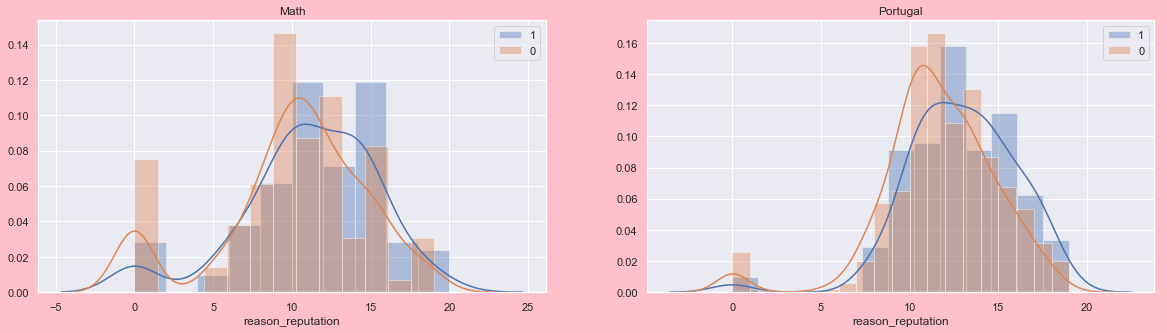

In [23]:
for reason in reasons:
    plt.figure(figsize = (20, 5), facecolor='pink', frameon=True);
    one_mat = X_mat[reason] == 1
    zero_mat = X_mat[reason] == 0
    one_por = X_por[reason] == 1
    zero_por = X_por[reason] == 0
    plt.subplot(1, 2, 1);
    sns.distplot(y_mat[one_mat])
    sns.distplot(y_mat[zero_mat])
    plt.legend(('1', '0'));
    plt.xlabel(reason);
    plt.title('Math');
    plt.subplot(1, 2, 2);
    sns.distplot(y_por[one_por])
    sns.distplot(y_por[zero_por])
    plt.legend(('1', '0'));
    plt.xlabel(reason);
    plt.title('Portugal');

### Additional transform of output variables include defintion of new variables y_pass and y_5. First one is 0 if student fail and 1 if student pass. The second one is from 0 to 4 (from D to A) according G3 score.

In [24]:
y_mat_pass = y_mat > 9
y_por_pass = y_por > 9
y_mat_pass = y_mat_pass.astype(int);
y_por_pass = y_por_pass.astype(int);

In [25]:
y_mat_5 = np.zeros(len(y_mat))
y_por_5 = np.zeros(len(y_por))
for i in range(len(y_mat)):
    if (y_mat[i] >= 16):
        y_mat_5[i] = 4
    if ((y_mat[i] == 15) or (y_mat[i] == 14)):
        y_mat_5[i] = 3
    if ((y_mat[i] == 13) or (y_mat[i] == 12)):
        y_mat_5[i] = 2
    if ((y_mat[i] == 11) or (y_mat[i] == 10)):
        y_mat_5[i] = 1
    if (y_mat[i] <= 9):
        y_mat_5[i] = 0
for i in range(len(y_por)):
    if (y_por[i] >= 16):
        y_por_5[i] = 4
    if ((y_por[i] == 15) or (y_por[i] == 14)):
        y_por_5[i] = 3
    if ((y_por[i] == 13) or (y_por[i] == 12)):
        y_por_5[i] = 2
    if ((y_por[i] == 11) or (y_por[i] == 10)):
        y_por_5[i] = 1
    if (y_por[i] <= 9):
        y_por_5[i] = 0

### Additional input variables are the same as I defined in the notebook beginnig, but excluding G1 or G2 or both scores. G2 and G1 is similar to G3 in most cases, but it is desireble to predict some grades using only demographics feature.

In [28]:
X_mat_pass = X_mat.drop(['G1', 'G2'], axis = 1)
X_por_pass = X_por.drop(['G1', 'G2'], axis = 1)
X_mat_5_G2 =  X_mat.drop(['G1'], axis = 1)
X_por_5_G2 =  X_por.drop(['G1'], axis = 1)
X_mat_5_G1 =  X_mat.drop(['G2'], axis = 1)
X_por_5_G1 =  X_por.drop(['G2'], axis = 1)

# 4. ML models and cross-validation procedures
### I wanted to solve 3 subtask  that's why I built 4 models for each disciplines. Choice of each model will be described before the cross-validation procedures.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score

### The first task is binary classification model (pass or fail). Input variables don't contain G1 and G2 score. I've decided to use decision tree, because we have a lot of binary and nominal attribute, and defined max_depth. I've also try RandomForest but it don't supply significant performance. F1 metric was chosen to balance between recall and precison. Also in cross-validation in all cases parametr shuffle is true, because of the structure of datasets (attribute school: first from GP school and after that from MS school) 

In [36]:
kfold = KFold(n_splits=10,shuffle=True) 
cv_mat_pass = kfold.split(X_mat_pass, y_mat_pass) 
cv_por_pass = kfold.split(X_por_pass, y_por_pass)

clf_mat_pass = DecisionTreeClassifier(max_depth=2)
clf_por_pass = DecisionTreeClassifier(max_depth=2)
scores_mat_pass = cross_val_score(clf_mat_pass, X_mat_pass, y_mat_pass, scoring='f1', cv=cv_mat_pass)
scores_por_pass = cross_val_score(clf_por_pass, X_por_pass, y_por_pass, scoring='f1', cv=cv_por_pass)

print('KFold f1_mat: {0:.3f} ± {1:.3f}'.format(scores_mat_pass.mean(), scores_mat_pass.std()))
print('KFold f1_por: {0:.3f} ± {1:.3f}'.format(scores_por_pass.mean(), scores_por_pass.std()))


KFold f1_mat: 0.793 ± 0.047
KFold f1_por: 0.912 ± 0.012


### 5-class classification is more difficult task, that's why in these part I decided to use G1 or G2 score and RandomForestClassifier. Results for data including G2 are better than for G1. And using RandomForest we decrease the risk of overfitting.

In [40]:
kfold = KFold(n_splits=10,shuffle=True) #using G1
cv_mat_5_G1 = kfold.split(X_mat_5_G1, y_mat_5) 
cv_por_5_G1 = kfold.split(X_por_5_G1, y_por_5)

clf_mat_5_G1 = RandomForestClassifier(max_depth=5, max_features=20, n_estimators=20)
clf_por_5_G1 = RandomForestClassifier(max_depth=5, max_features=15, n_estimators=20)
scores_mat_5_G1 = cross_val_score(clf_mat_5_G1, X_mat_5_G1, y_mat_5, cv=cv_mat_5_G1, scoring = 'f1_macro')
scores_por_5_G1 = cross_val_score(clf_por_5_G1, X_por_5_G1, y_por_5, cv=cv_por_5_G1, scoring = 'f1_macro')

print('KFold f1_macro_mat: {0:.3f} ± {1:.3f}'.format(scores_mat_5_G1.mean(), scores_mat_5_G1.std()))
print('KFold f1_macro_por: {0:.3f} ± {1:.3f}'.format(scores_por_5_G1.mean(), scores_por_5_G1.std()))

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


KFold f1_macro_mat: 0.527 ± 0.089
KFold f1_macro_por: 0.599 ± 0.039


In [41]:
kfold = KFold(n_splits=10,shuffle=True) #using G2
cv_mat_5_G2 = kfold.split(X_mat_5_G2, y_mat_5)
cv_por_5_G2 = kfold.split(X_por_5_G2, y_por_5)

clf_mat_5_G2 = RandomForestClassifier(max_depth=5, max_features=20, n_estimators=20)
clf_por_5_G2 = RandomForestClassifier(max_depth=5, max_features=15, n_estimators=20)
scores_mat_5_G2 = cross_val_score(clf_mat_5_G2, X_mat_5_G2, y_mat_5, cv=cv_mat_5_G2, scoring = 'f1_macro')
scores_por_5_G2 = cross_val_score(clf_por_5_G2, X_por_5_G2, y_por_5, cv=cv_por_5_G2, scoring = 'f1_macro')

print('KFold f1_macro_mat: {0:.3f} ± {1:.3f}'.format(scores_mat_5_G2.mean(), scores_mat_5_G2.std()))
print('KFold f1_macro_por: {0:.3f} ± {1:.3f}'.format(scores_por_5_G2.mean(), scores_por_5_G2.std()))

KFold f1_macro_mat: 0.734 ± 0.086
KFold f1_macro_por: 0.749 ± 0.060


### And the third task was to forecast the G3 score out of 20. For this regression task I've decided to use RandomForestRegressor and metric is Root MSE. For this task I used full dataset includibg G1 and G2 score.

In [43]:
kfold = KFold(n_splits=10,shuffle=True)
cv_mat = kfold.split(X_mat, y_mat)
cv_por = kfold.split(X_por, y_por)

clf_mat = RandomForestRegressor(max_depth = 6, max_features = 20, n_estimators = 30)
clf_por = RandomForestRegressor(max_depth = 6, max_features = 20, n_estimators = 30)
scores_mat = cross_val_score(clf_mat, X_mat, y_mat, scoring='neg_mean_squared_error', cv=cv_mat)
scores_por = cross_val_score(clf_por, X_por, y_por, scoring='neg_mean_squared_error', cv=cv_por)

print('KFold mean square error mat: {0:.3f} ± {1:.3f}'.format(abs(scores_mat).mean(), scores_mat.std()))
print('KFold mean square error por: {0:.3f} ± {1:.3f}'.format(abs(scores_por).mean(), scores_por.std()))

KFold mean square error mat: 2.690 ± 1.221
KFold mean square error por: 1.677 ± 0.660


### Also I wanted to compare with other Regressor and tried GradientBoostingRegressor but there was no significant performance.

In [49]:
kfold = KFold(n_splits=10,shuffle=True)
cv_mat = kfold.split(X_mat, y_mat)
cv_por = kfold.split(X_por, y_por)

clf_mat_grad = GradientBoostingRegressor(max_depth = 4, n_estimators = 30)
clf_por_grad = GradientBoostingRegressor(max_depth = 4, n_estimators = 30)
scores_mat = cross_val_score(clf_mat_grad, X_mat, y_mat, scoring='neg_mean_squared_error', cv=cv_mat)
scores_por = cross_val_score(clf_por_grad, X_por, y_por, scoring='neg_mean_squared_error', cv=cv_por)

print('KFold mean square error mat: {0:.3f} ± {1:.3f}'.format(abs(scores_mat).mean(), scores_mat.std()))
print('KFold mean square error por: {0:.3f} ± {1:.3f}'.format(abs(scores_por).mean(), scores_por.std()))

KFold mean square error mat: 2.677 ± 1.118
KFold mean square error por: 1.641 ± 0.763


# 5. Analysis of the obtained results
### I also wanted to know which features are more important for my classifier and regressor

In [50]:
X_mat_pass_train, X_mat_pass_test, y_mat_pass_train, y_mat_pass_test = train_test_split(X_mat_pass, y_mat_pass, test_size=0.33, shuffle = True)
clf_mat_pass.fit(X_mat_pass_train, y_mat_pass_train)
y_mat_pass_predicted = clf_mat_pass.predict(X_mat_pass_test)
print('F1 score on test set for Math is {}'.format(f1_score(y_mat_pass_test, y_mat_pass_predicted)))

F1 score on test set for Math is 0.7958115183246074


In [51]:
X_por_pass_train, X_por_pass_test, y_por_pass_train, y_por_pass_test = train_test_split(X_por_pass, y_por_pass, test_size=0.33, shuffle = True)
clf_por_pass.fit(X_por_pass_train, y_por_pass_train)
y_por_pass_predicted = clf_por_pass.predict(X_por_pass_test)
print('F1 score on test set for Portugal is {}'.format(f1_score(y_por_pass_test, y_por_pass_predicted)))

F1 score on test set for Portugal is 0.9226666666666665


### For binary classifeir in Math the most important feature is failure. It was mentioned during the vizualiztion.

In [52]:
i = 0
for column in X_mat_pass.columns:
    print(column,'{0:.3f}%'.format((clf_mat_pass.feature_importances_[i])*100))
    i = i+1

school 0.000%
sex 0.000%
age 0.000%
address 0.000%
famsize 0.000%
Pstatus 0.000%
Medu 0.000%
Fedu 0.000%
Mjob 0.000%
Fjob 0.000%
guardian 0.000%
traveltime 0.000%
studytime 0.000%
failures 70.360%
schoolsup 0.000%
famsup 0.000%
paid 0.000%
activities 0.000%
nursery 0.000%
higher 0.000%
internet 0.000%
romantic 0.000%
famrel 0.000%
freetime 0.000%
goout 0.000%
Dalc 0.000%
Walc 0.000%
health 0.000%
absences 29.640%
reason_course 0.000%
reason_home 0.000%
reason_other 0.000%
reason_reputation 0.000%


### For binary classifier in Portugal the most important feature is also failure.

In [53]:
i = 0
for column in X_por_pass.columns:
    print(column,'{0:.3f}%'.format((clf_por_pass.feature_importances_[i])*100))
    i = i+1

school 15.742%
sex 0.000%
age 0.000%
address 0.000%
famsize 0.000%
Pstatus 0.000%
Medu 0.000%
Fedu 0.000%
Mjob 0.000%
Fjob 0.000%
guardian 0.000%
traveltime 0.000%
studytime 0.000%
failures 69.162%
schoolsup 0.000%
famsup 0.000%
paid 0.000%
activities 0.000%
nursery 0.000%
higher 0.000%
internet 0.000%
romantic 0.000%
famrel 0.000%
freetime 0.000%
goout 0.000%
Dalc 0.000%
Walc 0.000%
health 0.000%
absences 0.000%
reason_course 0.000%
reason_home 15.096%
reason_other 0.000%
reason_reputation 0.000%


In [56]:
X_mat_train, X_mat_test, y_mat_train, y_mat_test = train_test_split(X_mat, y_mat, test_size=0.33, shuffle = True)
clf_mat.fit(X_mat_train, y_mat_train)
y_mat_predicted = clf_mat.predict(X_mat_test)
print('Mean squared error on test set for Math is {}'.format(mean_squared_error(y_mat_test, y_mat_predicted)))

Mean squared error on test set for Math is 2.564247200546583


In [60]:
X_por_train, X_por_test, y_por_train, y_por_test = train_test_split(X_por, y_por, test_size=0.33, shuffle = True)
clf_por.fit(X_por_train, y_por_train)
y_por_predicted = clf_por.predict(X_por_test)
print('Mean squared error on test set for Portugal is {}'.format(mean_squared_error(y_por_test, y_por_predicted)))

Mean squared error on test set for Portugal is 1.2258254809387947


### For regressors the most important feature is G2 score, because it is high correlated with G3. 

In [64]:
i = 0
for column in X_por.columns:
    print(column,'{0:.3f}%'.format((clf_mat.feature_importances_[i])*100))
    i = i+1

school 0.141%
sex 0.164%
age 1.482%
address 0.111%
famsize 0.080%
Pstatus 0.091%
Medu 0.820%
Fedu 0.357%
Mjob 0.589%
Fjob 0.588%
guardian 0.153%
traveltime 0.285%
studytime 0.839%
failures 3.001%
schoolsup 0.491%
famsup 0.035%
paid 0.139%
activities 0.409%
nursery 0.066%
higher 0.121%
internet 0.045%
romantic 0.200%
famrel 0.730%
freetime 0.668%
goout 1.001%
Dalc 0.030%
Walc 0.404%
health 0.330%
absences 10.816%
G1 22.503%
G2 52.439%
reason_course 0.463%
reason_home 0.226%
reason_other 0.100%
reason_reputation 0.085%


In [63]:
i = 0
for column in X_por.columns:
    print(column,'{0:.3f}%'.format((clf_por.feature_importances_[i])*100))
    i = i+1

school 0.611%
sex 0.174%
age 1.202%
address 0.091%
famsize 0.125%
Pstatus 0.013%
Medu 0.516%
Fedu 0.137%
Mjob 0.285%
Fjob 0.069%
guardian 0.034%
traveltime 0.431%
studytime 0.224%
failures 5.104%
schoolsup 0.164%
famsup 0.410%
paid 0.069%
activities 0.241%
nursery 0.168%
higher 1.247%
internet 0.111%
romantic 0.160%
famrel 1.033%
freetime 0.691%
goout 0.209%
Dalc 0.666%
Walc 0.818%
health 0.507%
absences 2.737%
G1 24.367%
G2 56.650%
reason_course 0.229%
reason_home 0.070%
reason_other 0.357%
reason_reputation 0.079%


## Conclusion
### 2 classification task and 1 regression task show that decision tree and ensembles can be applyed for both tasks. Vizualing analysis was done. The solutions are DecisionTreeClassifier, RandomForestClassifier and RandomForestRegressor. Hyperparameters were adjusted and Cross-validation procedure was implemented to estimate the quality of models. However, these models can have a better set of hyperparametrs than in this implementation. Precision of another models may be better. Overall, results for portugal are better than for math, because of the portugal dataset is 2 times more than math one. Despite the high corelation of G1, G2 and G3, a large MSE occurs thanks to student how has G2 score around 15 but finally get 0. Also, I think, the quallity of prediction can be increased if dataset contains standartized data (normalized) such as age and absences. 